# NumPy, SciPy, Pandas, matplotlib, seaborn

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Disclaimer

Няма да влизаме във всичко. Няма дори да чертаем пълна картинка – петте библиотеки са огромни и е добре да разгледате всяка от тях за детайли.

# NumPy

Най-важното нещо в NumPy е `np.array`, което е многомерен масив (тензор) с който може да извършваме стандартните операции.

In [2]:
array = np.array([[ 1,  2,  3],
                  [ 4,  5,  6],
                  [ 7,  8,  9],
                  [10, 11, 12]])
array

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

## Основи

Масивите имат следните атрибути:

* `ndim` – брой измерения
* `shape` – "кортеж" с размерности на всяко измерение
* `size` – брой елементи
* `dtype` – тип на елементите (всички елементи са от един тип)
* `itemsize` – брой байтове за един елемент

In [3]:
array.ndim

2

In [4]:
array.shape

(4, 3)

In [5]:
array.size

12

In [6]:
array.dtype

dtype('int64')

In [7]:
array.itemsize

8

In [8]:
array.dtype

dtype('int64')

NumPy ползва библиотеки на Fortran и C++ за да прави ефективни изчисления. По тази причина обектите му са по-ограничени от стандартни питонски масиви, но пък много по-ефективни.

## Индексация

Редове могат да се вземат с индексация:

In [9]:
array[0]

array([1, 2, 3])

In [10]:
array[-1]

array([10, 11, 12])

Елементи също:

In [11]:
array[1, 2]

6

Ако искате да вземете цяло измерение, може да ползвате slice (както и празен такъв):

In [12]:
array[1, :]

array([4, 5, 6])

In [13]:
array[:, 1]

array([ 2,  5,  8, 11])

In [14]:
array[:3, 1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

## Промяна на формата

Може да промените размера с `reshape`.

In [15]:
array.reshape(4, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [16]:
array.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [17]:
array.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Аргумент от `-1` определя неясно измерение:

In [18]:
array.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [19]:
array.reshape(-1, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [20]:
array.reshape(-1, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

## Инициализация

Има `ones` и `zeros`, които инициализират масив с определени размери.

In [21]:
np.ones(4)

array([ 1.,  1.,  1.,  1.])

In [22]:
np.zeros((4, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [23]:
np.ones((2, 3, 4))

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

Има и още няколко подобни:

Единична матрица.

In [24]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Диагонална матрица:

In [25]:
np.diag([1, 2, 3, 4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Матрица с произволни стойности в $[0, 1)$:

In [26]:
np.random.rand(3, 4)

array([[ 0.56514321,  0.86293266,  0.48961456,  0.53155191],
       [ 0.37221079,  0.10859702,  0.17961876,  0.01028912],
       [ 0.95140075,  0.10041546,  0.21515791,  0.63846962]])

NumPy има няколко типа – може да ги определяте при конструкция:

In [27]:
np.ones((3, 4), dtype=np.bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [28]:
np.ones((3, 4), dtype=np.int8)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int8)

In [29]:
np.ones((3, 4), dtype=np.float128)

array([[ 1.0,  1.0,  1.0,  1.0],
       [ 1.0,  1.0,  1.0,  1.0],
       [ 1.0,  1.0,  1.0,  1.0]], dtype=float128)

## Операции

Може да мислите за елементите като матрици, но трябва да знаете, че операциите с тях се **прилагат elementwise**:

In [30]:
i = np.eye(4)
i

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [31]:
random_numbers = np.random.rand(4, 4)
random_numbers

array([[ 0.48206938,  0.58323858,  0.39795418,  0.35712094],
       [ 0.44436829,  0.92957163,  0.63812352,  0.4267433 ],
       [ 0.09840043,  0.19810846,  0.23865456,  0.15388172],
       [ 0.67463862,  0.97097505,  0.2280277 ,  0.14298459]])

Произведението на тези две матрици трябва да даде `random_numbers` (`i` е единична матрица). Резултата, обаче, е друг:

In [32]:
np.eye(4) * np.random.rand(4, 4)

array([[ 0.48733884,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.0018842 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.16421426,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.38559102]])

Събирането е същото:

In [33]:
i + random_numbers

array([[ 1.48206938,  0.58323858,  0.39795418,  0.35712094],
       [ 0.44436829,  1.92957163,  0.63812352,  0.4267433 ],
       [ 0.09840043,  0.19810846,  1.23865456,  0.15388172],
       [ 0.67463862,  0.97097505,  0.2280277 ,  1.14298459]])

Както и повдигането на степен:

In [34]:
random_numbers ** i

array([[ 0.48206938,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.92957163,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.23865456,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.14298459]])

Ако единия операнд е скалар, операцията се "векторизира" – изпълнява се за всеки елемент:

In [35]:
random_numbers + 1

array([[ 1.48206938,  1.58323858,  1.39795418,  1.35712094],
       [ 1.44436829,  1.92957163,  1.63812352,  1.4267433 ],
       [ 1.09840043,  1.19810846,  1.23865456,  1.15388172],
       [ 1.67463862,  1.97097505,  1.2280277 ,  1.14298459]])

In [36]:
(random_numbers * 10).astype(np.int64)

array([[4, 5, 3, 3],
       [4, 9, 6, 4],
       [0, 1, 2, 1],
       [6, 9, 2, 1]])

In [37]:
random_numbers - 0.5

array([[-0.01793062,  0.08323858, -0.10204582, -0.14287906],
       [-0.05563171,  0.42957163,  0.13812352, -0.0732567 ],
       [-0.40159957, -0.30189154, -0.26134544, -0.34611828],
       [ 0.17463862,  0.47097505, -0.2719723 , -0.35701541]])

Резултата може и да е друг тип:

In [38]:
random_numbers >= 0.5

array([[False,  True, False, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True,  True, False, False]], dtype=bool)

## Индексация (2)

Може да индексираме с масиви и да вземем стойностите от няколко места:

In [39]:
numbers = (np.random.rand(12) * 100).astype(np.int64)
numbers

array([96, 24, 46, 52, 11,  1, 91, 25, 72, 95, 48, 93])

In [40]:
print("numbers[2] = {}".format(numbers[2]))
print("numbers[4] = {}".format(numbers[4]))
print("numbers[6] = {}".format(numbers[6]))
numbers[[2, 4, 6]]

numbers[2] = 46
numbers[4] = 11
numbers[6] = 91


array([46, 11, 91])

Може да индексираме и с булев масив:

In [41]:
random_numbers >= 0.5

array([[False,  True, False, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True,  True, False, False]], dtype=bool)

In [42]:
random_numbers[random_numbers >= 0.5]

array([ 0.58323858,  0.92957163,  0.63812352,  0.67463862,  0.97097505])

Като нещо допълнително, ако искаме да оставим числата по-малки от 0.5 да са нули, може да го направим така:

In [43]:
random_numbers * (random_numbers >= 0.5)

array([[ 0.        ,  0.58323858,  0.        ,  0.        ],
       [ 0.        ,  0.92957163,  0.63812352,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.67463862,  0.97097505,  0.        ,  0.        ]])

Това работи, защото `True` се брои за `1`, а `False` за `0`.

## Broadcasting

Ако единия операнд има по-малко измерения, операцията се прилага многократно за всеки елемент от другите измерения:

In [44]:
random_numbers + np.array([1, 2, 3, 4])

array([[ 1.48206938,  2.58323858,  3.39795418,  4.35712094],
       [ 1.44436829,  2.92957163,  3.63812352,  4.4267433 ],
       [ 1.09840043,  2.19810846,  3.23865456,  4.15388172],
       [ 1.67463862,  2.97097505,  3.2280277 ,  4.14298459]])

In [45]:
random_numbers + np.array([[1], [2], [3], [4]])

array([[ 1.48206938,  1.58323858,  1.39795418,  1.35712094],
       [ 2.44436829,  2.92957163,  2.63812352,  2.4267433 ],
       [ 3.09840043,  3.19810846,  3.23865456,  3.15388172],
       [ 4.67463862,  4.97097505,  4.2280277 ,  4.14298459]])

## Stacking

Може да "конкатенираме" масиви:

In [46]:
random_numbers = ((np.random.rand(3, 4) * 100) + 1).astype(np.int64)
random_numbers

array([[59,  3, 75, 25],
       [66, 56,  1,  6],
       [41, 12, 20, 16]])

In [47]:
np.hstack([random_numbers, np.eye(3, dtype=np.int64)])

array([[59,  3, 75, 25,  1,  0,  0],
       [66, 56,  1,  6,  0,  1,  0],
       [41, 12, 20, 16,  0,  0,  1]])

In [48]:
np.vstack([random_numbers, np.diag([1, 2, 3, 4])])

array([[59,  3, 75, 25],
       [66, 56,  1,  6],
       [41, 12, 20, 16],
       [ 1,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  0,  4]])

## Разни други

`ravel` "разплита" масив:

In [49]:
tensor = np.random.rand(2, 3, 4)
tensor

array([[[ 0.7381764 ,  0.82545346,  0.19453735,  0.94529379],
        [ 0.42152962,  0.83533814,  0.8285769 ,  0.94241443],
        [ 0.51996849,  0.34264102,  0.36657068,  0.09126189]],

       [[ 0.31964768,  0.59214193,  0.27509901,  0.4741279 ],
        [ 0.74989272,  0.00107352,  0.20484901,  0.36730572],
        [ 0.1438264 ,  0.39187307,  0.80343207,  0.98656452]]])

In [50]:
tensor.ravel()

array([ 0.7381764 ,  0.82545346,  0.19453735,  0.94529379,  0.42152962,
        0.83533814,  0.8285769 ,  0.94241443,  0.51996849,  0.34264102,
        0.36657068,  0.09126189,  0.31964768,  0.59214193,  0.27509901,
        0.4741279 ,  0.74989272,  0.00107352,  0.20484901,  0.36730572,
        0.1438264 ,  0.39187307,  0.80343207,  0.98656452])

`np.arange` е аналогичен на `range` в Python:

In [51]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

`np.linspace` връща точки в линейно пространство:

In [52]:
np.linspace(10, 20, 5)

array([ 10. ,  12.5,  15. ,  17.5,  20. ])

In [53]:
np.linspace(0, 10)

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

Има и доста функции:

* `sum`
* `mean`
* `median`
* `max`
* `min`
* ...

Те приемат аргумент за измерение, по което да работят.

In [54]:
random_numbers

array([[59,  3, 75, 25],
       [66, 56,  1,  6],
       [41, 12, 20, 16]])

In [55]:
random_numbers.sum()

380

In [56]:
random_numbers.sum(axis=0)

array([166,  71,  96,  47])

In [57]:
random_numbers.sum(axis=1)

array([162, 129,  89])

In [58]:
random_numbers.sum(0)

array([166,  71,  96,  47])

In [59]:
random_numbers.max()

75

In [60]:
random_numbers.max(1)

array([75, 66, 41])

In [61]:
random_numbers.mean()

31.666666666666668

In [62]:
random_numbers.mean(0)

array([ 55.33333333,  23.66666667,  32.        ,  15.66666667])

## Universal Functions

NumPy предлага и функции, които се изпълняват elementwise върху масива.

In [63]:
numbers = np.random.rand(3, 3) * 3 + 1
numbers

array([[ 3.68898776,  3.22594365,  1.45144055],
       [ 1.19180113,  1.37546678,  1.57580796],
       [ 3.22560783,  3.07478271,  3.17018955]])

In [64]:
np.exp(numbers)

array([[ 40.0043326 ,  25.17732149,   4.26926016],
       [  3.29300699,   3.95692332,   4.83464626],
       [ 25.16886789,  21.64517805,  23.81199752]])

In [65]:
np.log(numbers)

array([[ 1.3053521 ,  1.17122551,  0.37255654],
       [ 0.17546571,  0.31879315,  0.45476813],
       [ 1.17112141,  1.12323423,  1.15379138]])

In [66]:
np.sin(numbers)

array([[-0.52046473, -0.084251  ,  0.99288555],
       [ 0.92903687,  0.98098376,  0.99998744],
       [-0.08391637,  0.06676026, -0.028593  ]])

Прилагането на функция на всеки елемент е малко тегаво:

In [67]:
def plus_one_square(x):
    return x**2 + 2 * x + 1

plus_one_square(3)

16

Има декоратор, `np.vectorize`, който прави функцията работеща:

In [68]:
vectorized = np.vectorize(plus_one_square)
vectorized(numbers)

array([[ 21.98660624,  17.85859972,   6.00956076],
       [  4.80399217,   5.64284244,   6.63478667],
       [ 17.85576153,  16.60385411,  17.39048089]])

Разбира се, това е бавно. Ако можете, по-добре да си разпишете сметката:

In [69]:
numbers**2 + 2 * numbers + 1

array([[ 21.98660624,  17.85859972,   6.00956076],
       [  4.80399217,   5.64284244,   6.63478667],
       [ 17.85576153,  16.60385411,  17.39048089]])

Или, донякъде изненадващо:

In [70]:
plus_one_square(numbers)

array([[ 21.98660624,  17.85859972,   6.00956076],
       [  4.80399217,   5.64284244,   6.63478667],
       [ 17.85576153,  16.60385411,  17.39048089]])

Duck Typing FTW!

## Линейна алгебра

Има и разни познати неща от линейната алгебра.

In [71]:
matrix = np.arange(1, 10).reshape(3, 3)
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [72]:
matrix.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [73]:
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

В Python (баси тъпия език) има оператор за умножение на матрици – `@` (сериозно!):

In [74]:
matrix @ np.eye(3)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

In [75]:
np.diag([1, 2, 3]) @ matrix

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

Може и да обръщате матрица:

In [76]:
matrix = np.random.rand(3, 3)
matrix

array([[ 0.66043013,  0.83460889,  0.26150279],
       [ 0.82337737,  0.17953916,  0.59095886],
       [ 0.16145234,  0.60126501,  0.91035188]])

In [77]:
inverse = np.linalg.inv(matrix)
inverse

array([[ 0.34836317,  1.09396017, -0.81021791],
       [ 1.18763479, -1.01489049,  0.31766697],
       [-0.8461863 ,  0.47629463,  1.03235855]])

In [78]:
matrix @ inverse

array([[  1.00000000e+00,  -9.77499451e-17,   5.55111512e-17],
       [  3.79750131e-17,   1.00000000e+00,   0.00000000e+00],
       [ -1.11022302e-16,  -1.11022302e-16,   1.00000000e+00]])

In [79]:
(matrix @ inverse).round(2)

array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [-0., -0.,  1.]])

Разбира се, (1) тази операция не винаги минава и (2) е супер бавна.

## Още

В NumPy има още доста. Най-добре прегледайте документацията набързо:

* http://www.numpy.org/
* [Quickstart Tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* https://google.com/

# SciPy

SciPy е огромен. Ето само някои от нещата, които има:

* Clustering package (`scipy.cluster`)
* Constants (`scipy.constants`)
* Discrete Fourier transforms (`scipy.fftpack`)
* Integration and ODEs (`scipy.integrate`)
* Interpolation (`scipy.interpolate`)
* Input and output (`scipy.io`)
* Linear algebra (`scipy.linalg`)
* Miscellaneous routines (`scipy.misc`)
* Multi-dimensional image processing (`scipy.ndimage`)
* Orthogonal distance regression (`scipy.odr`)
* Optimization and root finding (`scipy.optimize`)
* Signal processing (`scipy.signal`)
* Sparse matrices (`scipy.sparse`)
* Sparse linear algebra (`scipy.sparse.linalg`)
* Compressed Sparse Graph Routines (`scipy.sparse.csgraph`)
* Spatial algorithms and data structures (`scipy.spatial`)
* Special functions (`scipy.special`)
* Statistical functions (`scipy.stats`)
* Statistical functions for masked arrays (`scipy.stats.mstats`)

In [80]:
scipy.optimize.minimize(lambda x: x**2 + 2 * x + 1, 0.7123412)

      fun: 0.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.00000001])

Как? Сложно.

Като друго забавление, нека видим интеграцията:

In [81]:
from matplotlib.patches import Polygon

def draw_sine_integration_example():
    func = np.sin
    a, b = np.pi / 2, np.pi
    x = np.linspace(-0.2, np.pi * 1.5)
    y = func(x)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(x, y, 'r', linewidth=2)
    plt.grid()

    ix = np.linspace(a, b)
    iy = func(ix)
    verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    ax.axhline(color='k')
    ax.axvline(color='k')
    ax.annotate(r'$\frac{\pi}{2}$', (np.pi / 2, 0), xytext=(0, -20), textcoords='offset points', size='x-large')
    ax.annotate(r'$\pi$', (np.pi, 0), xytext=(0, -20), textcoords='offset points', size='x-large')

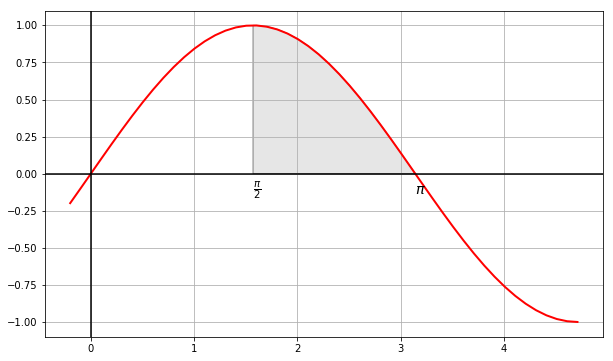

In [82]:
draw_sine_integration_example()

$$
\begin{align*}
\int_{\pi / 2}^{\pi}\sin(x)\mathrm{d} x &= - \cos(x) \Big|_{\pi / 2}^\pi \\
&= - \cos(\pi) - \big(- \cos(\frac{\pi}{2}) \big) \\
&= \cos(\frac{\pi}{2}) - \cos(\pi) \\
&= 0 - (-1) \\
&= 1
\end{align*} 
$$

In [83]:
scipy.integrate.quad(lambda x: np.sin(x), np.pi / 2, np.pi)

(1.0000000000000002, 1.1102230246251569e-14)

# Pandas

`pandas` е data science библиотека за Python. Дава ни два основни типа – `pd.Series` и `pd.DataFrame`.

* `pd.Series` е едноизмерен масив от стойности
* `pd.DataFrame` е таблица от данни. Може да мислите за нея като масив от `pd.Series`, където последните са всяка колона.

Ще разгледаме първо `pd.Series`.

In [84]:
series = pd.Series([2, 4, -1, 4])
series

0    2
1    4
2   -1
3    4
dtype: int64

Може да вземете стойностите като NumPy масив:

In [85]:
series.values

array([ 2,  4, -1,  4])

Всеки `Series` има и иднекс:

In [86]:
series.index

RangeIndex(start=0, stop=4, step=1)

Индекса може да има произволни стойности:

In [87]:
series = pd.Series([2, 4, -1, 4], index=['a', 'b', 'c', 'd'])
series

a    2
b    4
c   -1
d    4
dtype: int64

In [88]:
series.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Индексирането работи както очакваме:

In [89]:
series['a']

2

In [90]:
series['e'] = -12
series

a     2
b     4
c    -1
d     4
e   -12
dtype: int64

In [91]:
series[['a', 'e', 'c']]

a     2
e   -12
c    -1
dtype: int64

Има и позната векторизация от NumPy:

In [92]:
series * 2

a     4
b     8
c    -2
d     8
e   -24
dtype: int64

In [93]:
series > 0

a     True
b     True
c    False
d     True
e    False
dtype: bool

Както и индексиране с булев series. Обърнете внимание на съвпадащите и запазващите се индекси:

In [94]:
series[series > 0]

a    2
b    4
d    4
dtype: int64

Може да прекарете `Series` през универсална функция:

In [95]:
np.log(series * series)

a    1.386294
b    2.772589
c    0.000000
d    2.772589
e    4.969813
dtype: float64

Може да конструирате `Series` с речник, където ключовете са индекса, а стойностите са... стойностите.

In [96]:
capitals = {'Bulgaria': 'Sofia', 'United Kingdom': 'London', 'Malaysia': None}
series = pd.Series(capitals)
series

Bulgaria           Sofia
Malaysia            None
United Kingdom    London
dtype: object

Има `isnull`

In [97]:
series.isnull()

Bulgaria          False
Malaysia           True
United Kingdom    False
dtype: bool

Индекса и редицата могат да имат имена:

In [98]:
series.name = 'capital'
series.index.name = 'country'
series

country
Bulgaria           Sofia
Malaysia            None
United Kingdom    London
Name: capital, dtype: object

Това понякога е полезно за да се създадат ясни данни.

Има и основните статистически операции:

In [99]:
series = pd.Series([1, 5, 3, 2, 9, 1, 13, 5, 1, 5])

In [100]:
series.mean()

4.5

In [101]:
series.median()

4.0

In [102]:
series.mode()

0    1
1    5
dtype: int64

In [103]:
series.std()

3.9228674319799399

In [104]:
series.var()

15.388888888888889

## DataFrame

DataFrame-а е таблица от данни, в която всяка колона има собствен тип.

Един начин да го конструираме е с речник, където всяка двойка ключ-стойност е колона.

In [105]:
pd.DataFrame({
'Name': ['John Snow', 'Arya Stark', 'Daenerys Targeryan', 'Jamie Lannister'],
'Gender': pd.Categorical(['male', 'female', 'female', 'male']),
'Age': [16, 11, 16, 36],
'Brothers': [3, 4, 2, 1],
'Sisters': [2, 1, 1, 1],
}, columns=['Name', 'Gender', 'Age', 'Brothers', 'Sisters'])

,Name,Gender,Age,Brothers,Sisters
0,John Snow,male,16,3,2
1,Arya Stark,female,11,4,1
2,Daenerys Targeryan,female,16,2,1
3,Jamie Lannister,male,36,1,1


`pd.Categorical` е нещо като `pd.Series`, но с по-оптимален запис в паметта.

In [106]:
pd.Categorical(['male', 'female', 'female', 'male'])

[male, female, female, male]
Categories (2, object): [female, male]

Може да дадем данните и таблично, като определим имената на колоните:

In [107]:
data = [
    ['Eddard Stark', 34, 41, 'Stark', 'male'],
    ['Catelyn Stark', 33, 40, 'Stark', 'female'],
    ['Daenerys Targaryen', 13, 16, 'Targaryen', 'female'],
    ['Tyrion Lannister', 24, 32, 'Lannister', 'male'],
    ['Jon Snow', 14, 16, 'Stark', 'male'],
    ['Brandon Stark', 7, 10, 'Stark', 'male'],
    ['Sansa Stark', 11, 13, 'Stark', 'female'],
    ['Arya Stark', 9, 11, 'Stark', 'female'],
    ['Theon Greyjoy', 18, 16, 'Greyjoy', 'male'],
    ['Davos Seaworth', 37, 49, 'Seaworth', 'male'],
    ['Jaime Lannister', 31, 36, 'Lannister', 'male'],
    ['Samwell Tarly', 14, 17, 'Tarly', 'male'],
    ['Cersei Lannister', 31, 36, 'Lannister', 'female'],
    ['Brienne of Tarth', 17, 32, 'Tarth', 'female']
]
characters = pd.DataFrame(data, columns=['name', 'book_age', 'tv_age', 'house', 'gender'])

In [108]:
characters

,name,book_age,tv_age,house,gender
0,Eddard Stark,34,41,Stark,male
1,Catelyn Stark,33,40,Stark,female
2,Daenerys Targaryen,13,16,Targaryen,female
3,Tyrion Lannister,24,32,Lannister,male
4,Jon Snow,14,16,Stark,male
5,Brandon Stark,7,10,Stark,male
6,Sansa Stark,11,13,Stark,female
7,Arya Stark,9,11,Stark,female
8,Theon Greyjoy,18,16,Greyjoy,male
9,Davos Seaworth,37,49,Seaworth,male


Индексирането взема колони (като series):

In [109]:
characters['name']

0           Eddard Stark
1          Catelyn Stark
2     Daenerys Targaryen
3       Tyrion Lannister
4               Jon Snow
5          Brandon Stark
6            Sansa Stark
7             Arya Stark
8          Theon Greyjoy
9         Davos Seaworth
10       Jaime Lannister
11         Samwell Tarly
12      Cersei Lannister
13      Brienne of Tarth
Name: name, dtype: object

In [110]:
characters.name

0           Eddard Stark
1          Catelyn Stark
2     Daenerys Targaryen
3       Tyrion Lannister
4               Jon Snow
5          Brandon Stark
6            Sansa Stark
7             Arya Stark
8          Theon Greyjoy
9         Davos Seaworth
10       Jaime Lannister
11         Samwell Tarly
12      Cersei Lannister
13      Brienne of Tarth
Name: name, dtype: object

In [111]:
characters[['name', 'tv_age']]

,name,tv_age
0,Eddard Stark,41
1,Catelyn Stark,40
2,Daenerys Targaryen,16
3,Tyrion Lannister,32
4,Jon Snow,16
5,Brandon Stark,10
6,Sansa Stark,13
7,Arya Stark,11
8,Theon Greyjoy,16
9,Davos Seaworth,49


Ако искаме да индексираме по редове, трябва да ползваме `loc`:

In [112]:
characters.loc[3]

name        Tyrion Lannister
book_age                  24
tv_age                    32
house              Lannister
gender                  male
Name: 3, dtype: object

Обърнете внимание, че резултате е `Series` от реда. Индекса е имената на колоните, а типа е най-генералния (`object`).

Може да вземете slice:

In [113]:
characters.loc[1:5]

,name,book_age,tv_age,house,gender
1,Catelyn Stark,33,40,Stark,female
2,Daenerys Targaryen,13,16,Targaryen,female
3,Tyrion Lannister,24,32,Lannister,male
4,Jon Snow,14,16,Stark,male
5,Brandon Stark,7,10,Stark,male


Може да комбинираме редове и колони с `loc`:

In [114]:
characters.loc[1:5, ['name', 'gender']]

,name,gender
1,Catelyn Stark,female
2,Daenerys Targaryen,female
3,Tyrion Lannister,male
4,Jon Snow,male
5,Brandon Stark,male


Бихме могли дори да преименуваме индекса:

In [115]:
characters.index = ['ned', 'cat', 'dany', 'tyrion', 'jon', 'bran', 'sansa', 'arya', 'theon', 'davos', 'jaime',
                    'sam', 'cersei', 'brienne']
characters

,name,book_age,tv_age,house,gender
ned,Eddard Stark,34,41,Stark,male
cat,Catelyn Stark,33,40,Stark,female
dany,Daenerys Targaryen,13,16,Targaryen,female
tyrion,Tyrion Lannister,24,32,Lannister,male
jon,Jon Snow,14,16,Stark,male
bran,Brandon Stark,7,10,Stark,male
sansa,Sansa Stark,11,13,Stark,female
arya,Arya Stark,9,11,Stark,female
theon,Theon Greyjoy,18,16,Greyjoy,male
davos,Davos Seaworth,37,49,Seaworth,male


Тогава индексацията става другояче:

In [116]:
subset = ['ned', 'cat', 'jaime']
columns = ['name', 'house', 'gender']
characters.loc[subset, columns]

,name,house,gender
ned,Eddard Stark,Stark,male
cat,Catelyn Stark,Stark,female
jaime,Jaime Lannister,Lannister,male


Може да правите стандартната векторна математика с колоните:

In [117]:
differences = characters.tv_age - characters.book_age
differences

ned         7
cat         7
dany        3
tyrion      8
jon         2
bran        3
sansa       2
arya        2
theon      -2
davos      12
jaime       5
sam         3
cersei      5
brienne    15
dtype: int64

Виждаме, че средно персонажите са по-възрастни в сериала:

In [118]:
differences.mean()

5.1428571428571432

In [119]:
differences.median()

4.0

Може да добавим колоната в DataFrame-а. Отново, обърнете внимание на съвпадащите индекси:

In [120]:
characters['age_difference'] = characters.tv_age - characters.book_age
characters

,name,book_age,tv_age,house,gender,age_difference
ned,Eddard Stark,34,41,Stark,male,7
cat,Catelyn Stark,33,40,Stark,female,7
dany,Daenerys Targaryen,13,16,Targaryen,female,3
tyrion,Tyrion Lannister,24,32,Lannister,male,8
jon,Jon Snow,14,16,Stark,male,2
bran,Brandon Stark,7,10,Stark,male,3
sansa,Sansa Stark,11,13,Stark,female,2
arya,Arya Stark,9,11,Stark,female,2
theon,Theon Greyjoy,18,16,Greyjoy,male,-2
davos,Davos Seaworth,37,49,Seaworth,male,12


Ако добавим нова колона с разминаващ се индекс, останалите стойности ще се попълнят като празни. Липсващите индекси ще се игнорират:

In [121]:
alive = pd.Series([False, True, False], index=['ned', 'dany', 'viserys'])
characters['alive'] = alive
characters

,name,book_age,tv_age,house,gender,age_difference,alive
ned,Eddard Stark,34,41,Stark,male,7,False
cat,Catelyn Stark,33,40,Stark,female,7,NaN
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,NaN
jon,Jon Snow,14,16,Stark,male,2,NaN
bran,Brandon Stark,7,10,Stark,male,3,NaN
sansa,Sansa Stark,11,13,Stark,female,2,NaN
arya,Arya Stark,9,11,Stark,female,2,NaN
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,NaN
davos,Davos Seaworth,37,49,Seaworth,male,12,NaN


Бележка: спойлерите са от първи сезон. Ако не сте го гледали – къде живеете?

Друга модификация:

In [122]:
characters['underage_tv'] = characters.tv_age < 18
characters

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
ned,Eddard Stark,34,41,Stark,male,7,False,False
cat,Catelyn Stark,33,40,Stark,female,7,NaN,False
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,NaN,False
jon,Jon Snow,14,16,Stark,male,2,NaN,True
bran,Brandon Stark,7,10,Stark,male,3,NaN,True
sansa,Sansa Stark,11,13,Stark,female,2,NaN,True
arya,Arya Stark,9,11,Stark,female,2,NaN,True
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,NaN,True
davos,Davos Seaworth,37,49,Seaworth,male,12,NaN,False


Може да попълним липсващите стойности с `fillna`. Това вече сме го виждали:

In [123]:
characters.alive = characters.alive.fillna(True)
characters

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
ned,Eddard Stark,34,41,Stark,male,7,False,False
cat,Catelyn Stark,33,40,Stark,female,7,True,False
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False
jon,Jon Snow,14,16,Stark,male,2,True,True
bran,Brandon Stark,7,10,Stark,male,3,True,True
sansa,Sansa Stark,11,13,Stark,female,2,True,True
arya,Arya Stark,9,11,Stark,female,2,True,True
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False


Spoiler alet: не всички са живи

Може да вземем и NumPy матрицата:

In [124]:
characters.values

array([['Eddard Stark', 34, 41, 'Stark', 'male', 7, False, False],
       ['Catelyn Stark', 33, 40, 'Stark', 'female', 7, True, False],
       ['Daenerys Targaryen', 13, 16, 'Targaryen', 'female', 3, True, True],
       ['Tyrion Lannister', 24, 32, 'Lannister', 'male', 8, True, False],
       ['Jon Snow', 14, 16, 'Stark', 'male', 2, True, True],
       ['Brandon Stark', 7, 10, 'Stark', 'male', 3, True, True],
       ['Sansa Stark', 11, 13, 'Stark', 'female', 2, True, True],
       ['Arya Stark', 9, 11, 'Stark', 'female', 2, True, True],
       ['Theon Greyjoy', 18, 16, 'Greyjoy', 'male', -2, True, True],
       ['Davos Seaworth', 37, 49, 'Seaworth', 'male', 12, True, False],
       ['Jaime Lannister', 31, 36, 'Lannister', 'male', 5, True, False],
       ['Samwell Tarly', 14, 17, 'Tarly', 'male', 3, True, True],
       ['Cersei Lannister', 31, 36, 'Lannister', 'female', 5, True, False],
       ['Brienne of Tarth', 17, 32, 'Tarth', 'female', 15, True, False]], dtype=object)

Може да махате колони и редове с `drop`:

In [125]:
characters.drop(['ned', 'cat', 'sansa', 'arya', 'bran'])

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False
jon,Jon Snow,14,16,Stark,male,2,True,True
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False
jaime,Jaime Lannister,31,36,Lannister,male,5,True,False
sam,Samwell Tarly,14,17,Tarly,male,3,True,True
cersei,Cersei Lannister,31,36,Lannister,female,5,True,False
brienne,Brienne of Tarth,17,32,Tarth,female,15,True,False


In [126]:
characters.drop(['tv_age', 'book_age', 'age_difference'], axis=1)

,name,house,gender,alive,underage_tv
ned,Eddard Stark,Stark,male,False,False
cat,Catelyn Stark,Stark,female,True,False
dany,Daenerys Targaryen,Targaryen,female,True,True
tyrion,Tyrion Lannister,Lannister,male,True,False
jon,Jon Snow,Stark,male,True,True
bran,Brandon Stark,Stark,male,True,True
sansa,Sansa Stark,Stark,female,True,True
arya,Arya Stark,Stark,female,True,True
theon,Theon Greyjoy,Greyjoy,male,True,True
davos,Davos Seaworth,Seaworth,male,True,False


И разбира се, индексацията също върши работа за това:

In [127]:
characters.house == 'Stark'

ned         True
cat         True
dany       False
tyrion     False
jon         True
bran        True
sansa       True
arya        True
theon      False
davos      False
jaime      False
sam        False
cersei     False
brienne    False
Name: house, dtype: bool

In [128]:
~(characters.house == 'Stark')

ned        False
cat        False
dany        True
tyrion      True
jon        False
bran       False
sansa      False
arya       False
theon       True
davos       True
jaime       True
sam         True
cersei      True
brienne     True
Name: house, dtype: bool

In [129]:
characters[~(characters.house == 'Stark')]

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False
jaime,Jaime Lannister,31,36,Lannister,male,5,True,False
sam,Samwell Tarly,14,17,Tarly,male,3,True,True
cersei,Cersei Lannister,31,36,Lannister,female,5,True,False
brienne,Brienne of Tarth,17,32,Tarth,female,15,True,False


Има и `rank`, който връща ранка при сортиране. `method` взема няколко стойности, които определят какво да стане със елементите, които са еднакви:

In [130]:
characters.tv_age.rank(method='min')

ned        13.0
cat        12.0
dany        4.0
tyrion      8.0
jon         4.0
bran        1.0
sansa       3.0
arya        2.0
theon       4.0
davos      14.0
jaime      10.0
sam         7.0
cersei     10.0
brienne     8.0
Name: tv_age, dtype: float64

In [131]:
characters['age_rank'] = characters.tv_age.rank(method='min')
characters

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv,age_rank
ned,Eddard Stark,34,41,Stark,male,7,False,False,13.0
cat,Catelyn Stark,33,40,Stark,female,7,True,False,12.0
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True,4.0
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False,8.0
jon,Jon Snow,14,16,Stark,male,2,True,True,4.0
bran,Brandon Stark,7,10,Stark,male,3,True,True,1.0
sansa,Sansa Stark,11,13,Stark,female,2,True,True,3.0
arya,Arya Stark,9,11,Stark,female,2,True,True,2.0
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True,4.0
davos,Davos Seaworth,37,49,Seaworth,male,12,True,False,14.0


In [132]:
characters.sort_values(by='age_rank')

,name,book_age,tv_age,house,gender,age_difference,alive,underage_tv,age_rank
bran,Brandon Stark,7,10,Stark,male,3,True,True,1.0
arya,Arya Stark,9,11,Stark,female,2,True,True,2.0
sansa,Sansa Stark,11,13,Stark,female,2,True,True,3.0
dany,Daenerys Targaryen,13,16,Targaryen,female,3,True,True,4.0
jon,Jon Snow,14,16,Stark,male,2,True,True,4.0
theon,Theon Greyjoy,18,16,Greyjoy,male,-2,True,True,4.0
sam,Samwell Tarly,14,17,Tarly,male,3,True,True,7.0
tyrion,Tyrion Lannister,24,32,Lannister,male,8,True,False,8.0
brienne,Brienne of Tarth,17,32,Tarth,female,15,True,False,8.0
jaime,Jaime Lannister,31,36,Lannister,male,5,True,False,10.0


## Агрегиращи операции

In [133]:
characters.sum()

name              Eddard StarkCatelyn StarkDaenerys TargaryenTyr...
book_age                                                        293
tv_age                                                          365
house             StarkStarkTargaryenLannisterStarkStarkStarkSta...
gender            malefemalefemalemalemalemalefemalefemalemalema...
age_difference                                                   72
alive                                                            13
underage_tv                                                       7
age_rank                                                        100
dtype: object

In [134]:
characters.sum(axis=1)

ned         95.0
cat         93.0
dany        38.0
tyrion      73.0
jon         38.0
bran        23.0
sansa       31.0
arya        26.0
theon       38.0
davos      113.0
jaime       83.0
sam         43.0
cersei      83.0
brienne     73.0
dtype: float64

In [135]:
characters.describe()

,book_age,tv_age,age_difference,age_rank
count,14.000000,14.000000,14.000000,14.000000
mean,20.928571,26.071429,5.142857,7.142857
std,10.395741,13.164429,4.417746,4.240050
min,7.000000,10.000000,-2.000000,1.000000
25%,13.250000,16.000000,2.250000,4.000000
50%,17.500000,24.500000,4.000000,7.500000
75%,31.000000,36.000000,7.000000,10.000000
max,37.000000,49.000000,15.000000,14.000000


In [136]:
characters.tv_age.value_counts()

16    3
32    2
36    2
13    1
17    1
11    1
10    1
41    1
40    1
49    1
Name: tv_age, dtype: int64

## Йерархични индекси

Поддържат се и йерархични индекси:

In [137]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -0.289566
   2   -0.205019
   3    0.962673
b  1    0.714998
   3    0.060588
c  1   -0.699749
   2    1.875907
d  2   -0.172063
   3   -1.295347
dtype: float64

Индекс обекта е малко по-особен:

In [138]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

Индексиране на редица с йерархичен индекс връща редицата на вложения индекс:

In [139]:
data['b']

1    0.714998
3    0.060588
dtype: float64

`unstack` обръща йерархичния индекс до измерение на таблицата:

In [140]:
data.unstack()

,1,2,3
a,-0.289566,-0.205019,0.962673
b,0.714998,NaN,0.060588
c,-0.699749,1.875907,NaN
d,NaN,-0.172063,-1.295347


`stack` е обратната операция:

In [141]:
data.unstack().stack()

a  1   -0.289566
   2   -0.205019
   3    0.962673
b  1    0.714998
   3    0.060588
c  1   -0.699749
   2    1.875907
d  2   -0.172063
   3   -1.295347
dtype: float64

`DataFrame`-а също може да има йерархични индекси по всички измерения:

In [142]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

Индексацията на колона връща друг `DataFrame`:

In [143]:
frame['Ohio']

Green  Red
a 1      0    1
  2      3    4
b 1      6    7
  2      9   10

Може да дадем имена на индексите:

In [144]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

`swaplevel` ни позволява да разменим реда на индексите:

In [145]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

Ако сортираме след това, нещата ще изглеждат както очакваме:

In [146]:
frame.swaplevel('key1', 'key2').sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## Join

Има и операции, подобни на join-овете в базите от данни:

In [147]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [148]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [149]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


merge прави стандартен join (декартово произведение на редовете):

In [150]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


По подразбиране се ползват съвпадащите колони. Може да го направим експлицитно:

In [151]:
pd.merge(df1, df2, on=['key'])

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


По подразбиране се прави inner join – ако някой ключ го няма в един от двата `DataFrame`-а, няма да го има и в резултата. outer join-а запази реда, попълвайки стойностите с `NaN`:

In [152]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


# Matplotlib

Следва кратък и непълен пример в matplotlib.

`plot` чертае функция:

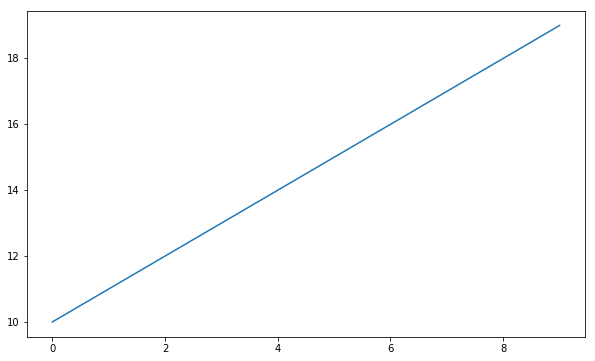

In [153]:
plt.figure(figsize=(10, 6))
data = np.arange(10, 20)
plt.plot(data);

`plot` приема два аргумента – $x$ и $f(x)$:

In [154]:
xs = np.arange(10)
ys = 2 ** xs

In [155]:
xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [156]:
ys

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

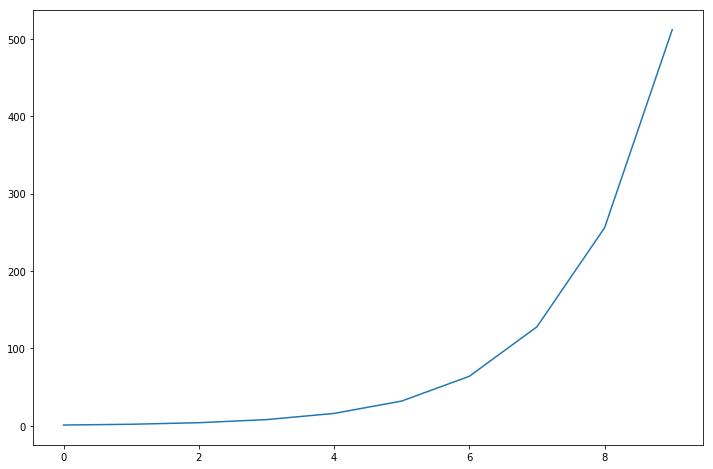

In [157]:
plt.figure(figsize=(12, 8))
plt.plot(xs, ys);

Тая функция е малко ръбата, затова е по-добре да ползваме `linspace`:

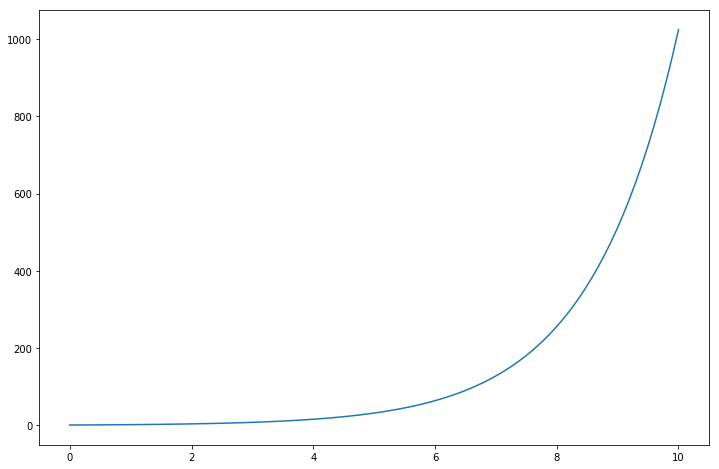

In [158]:
xs = np.linspace(0, 10, 100)
ys = 2 ** xs
plt.figure(figsize=(12, 8))
plt.plot(xs, ys);

`scatter` пък рисува точки:

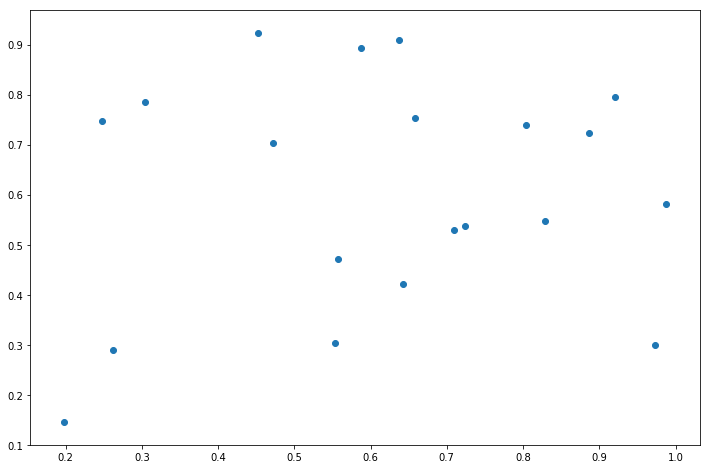

In [159]:
points = np.random.rand(20, 2)
plt.figure(figsize=(12, 8))
plt.scatter(points[:, 0], points[:, 1]);

In [160]:
points

array([[ 0.97262215,  0.30047185],
       [ 0.19791271,  0.14646429],
       [ 0.63692726,  0.9099295 ],
       [ 0.47254906,  0.70352359],
       [ 0.88595905,  0.72336768],
       [ 0.80403401,  0.73837108],
       [ 0.55746619,  0.47176068],
       [ 0.72407433,  0.53763379],
       [ 0.64242418,  0.42099044],
       [ 0.58687848,  0.89242448],
       [ 0.65768722,  0.75285178],
       [ 0.98729079,  0.58135932],
       [ 0.70941136,  0.52874458],
       [ 0.30434126,  0.78594863],
       [ 0.92046567,  0.7958211 ],
       [ 0.2617159 ,  0.28871312],
       [ 0.45256702,  0.92300496],
       [ 0.82900091,  0.54711944],
       [ 0.24721052,  0.74688184],
       [ 0.55324477,  0.30257539]])

In [161]:
points[:, 0]

array([ 0.97262215,  0.19791271,  0.63692726,  0.47254906,  0.88595905,
        0.80403401,  0.55746619,  0.72407433,  0.64242418,  0.58687848,
        0.65768722,  0.98729079,  0.70941136,  0.30434126,  0.92046567,
        0.2617159 ,  0.45256702,  0.82900091,  0.24721052,  0.55324477])

Настройките по подразбиране могат да се променят с `rc`:

In [162]:
plt.rc('figure', figsize=(12, 8))

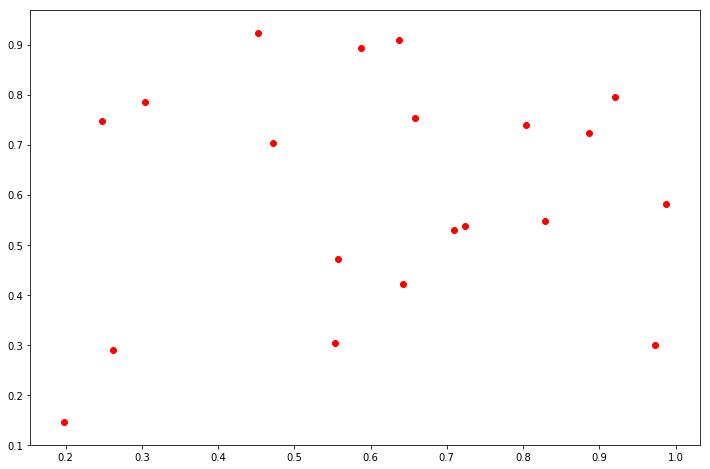

In [163]:
plt.scatter(points[:, 0], points[:, 1], color="red");

Повечето може да подавате цветове и стил:

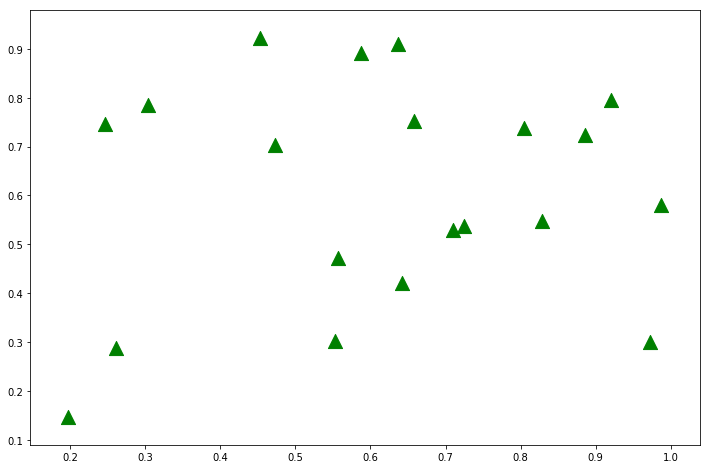

In [164]:
plt.scatter(points[:, 0], points[:, 1], marker='^', color='green', s=200);

Има и къс запис:

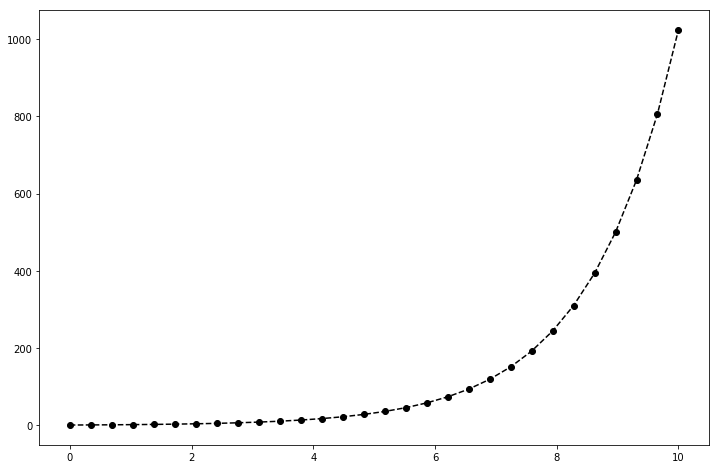

In [165]:
xs = np.linspace(0, 10, 30)
ys = 2 ** xs
plt.plot(xs, ys, 'ko--');

Може да нарисувате много неща наведнъж. При `%matplotlib inline` всички неща от една клетка ще се начертаят в една фигура.

In [166]:
a = np.random.rand(10, 2)
b = np.random.rand(10, 2)
c = np.random.rand(10, 2)

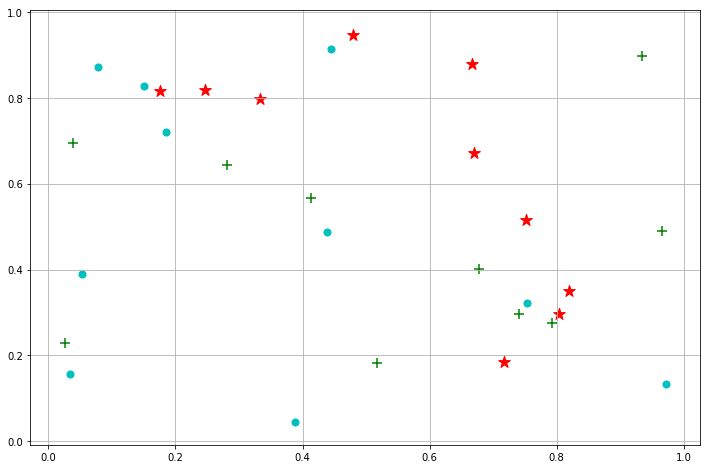

In [167]:
plt.scatter(a[:, 0], a[:, 1], marker='+', c='g', s=100)
plt.scatter(b[:, 0], b[:, 1], marker='*', c='r', s=150)
plt.scatter(c[:, 0], c[:, 1], marker='o', c='c', s=50)
plt.grid();

Може да чертаем и хистограми:

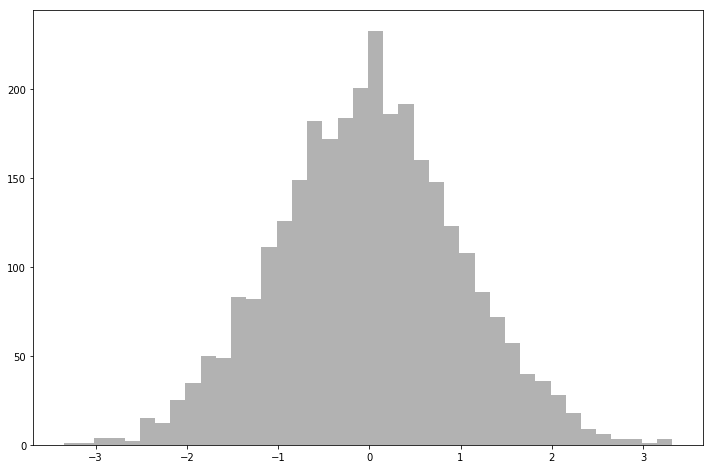

In [168]:
plt.hist(np.random.randn(3000), bins=40, color='k', alpha=0.3);

Може да съпоставим и хистограмата с едно нормално разпределение:

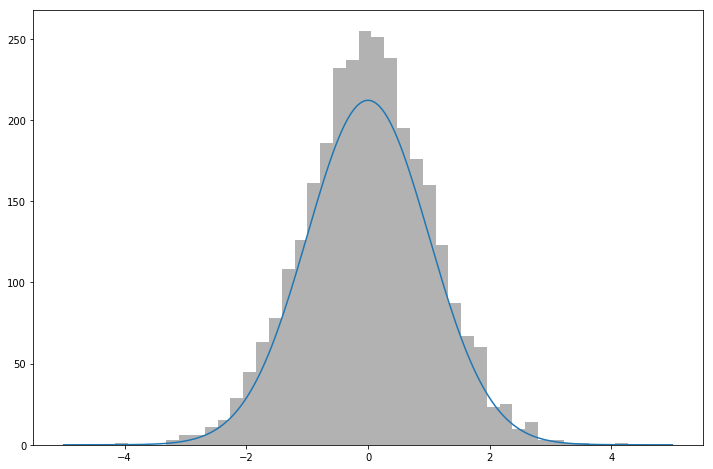

In [169]:
xs = np.linspace(-5, 5, 200)
ys = (1 / np.sqrt(2)) * np.exp(- xs ** 2 / 2)
plt.hist(np.random.randn(3000), bins=40, color='k', alpha=0.3)
plt.plot(xs, ys * 300);

Една фигура може да съдържа други subplot-ове:

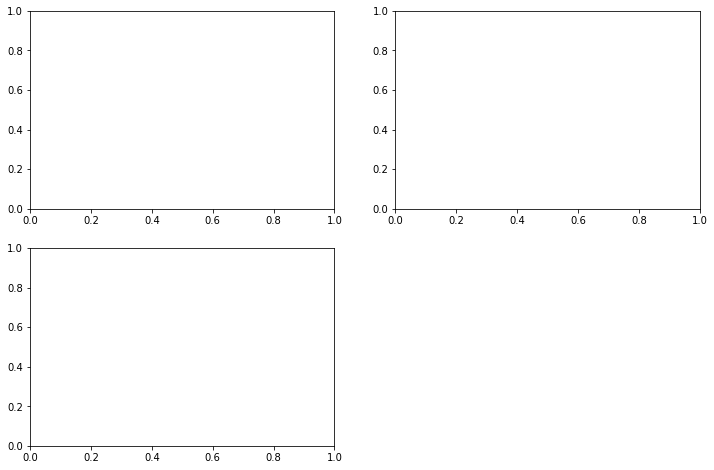

In [170]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Първите два аргумента (`2, 2`) са колко subplot-а да има хоризонтално и вертикално. Третия е индекса, който искаме да създадем:

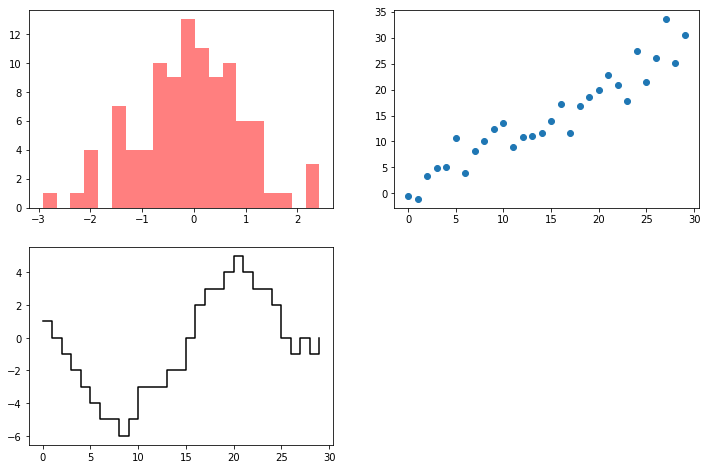

In [171]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(30).round().cumsum(), 'k-', drawstyle='steps-post');

За последно, нека видим и примера с интеграцията от по-рано:

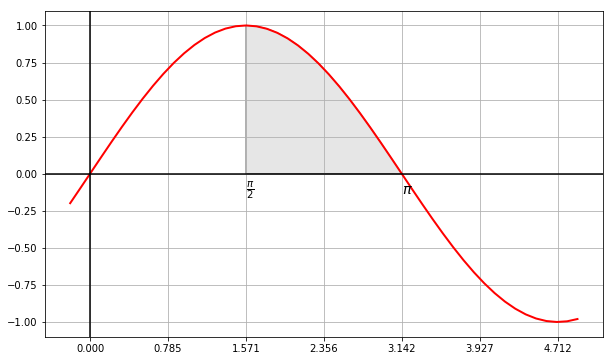

In [172]:
func = np.sin
a, b = np.pi / 2, np.pi
x = np.linspace(-0.2, np.pi * 1.5 + 0.2)
y = func(x)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'r', linewidth=2)
plt.grid()

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.xaxis.set_ticks(np.arange(0, 5, np.pi / 4))

ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.annotate(r'$\frac{\pi}{2}$', (np.pi / 2, 0), xytext=(0, -20), textcoords='offset points', size='x-large')
ax.annotate(r'$\pi$', (np.pi, 0), xytext=(0, -20), textcoords='offset points', size='x-large');

От тук нататък, най-добрия начин да научите повече за matplotlib е да гледате примери и да ровите из документацията. Обикновено имате конкретен проблем, който искате да решите, и това работи най-добре.

Освен ако не искате да налеете 20-40 часа да разберете всичко в детайли, което също не е лошо.

# Seaborn

Тази библиотека дава интерфейс от по-високо ниво за чертане на диаграми. Също, има интеграция с pandas.

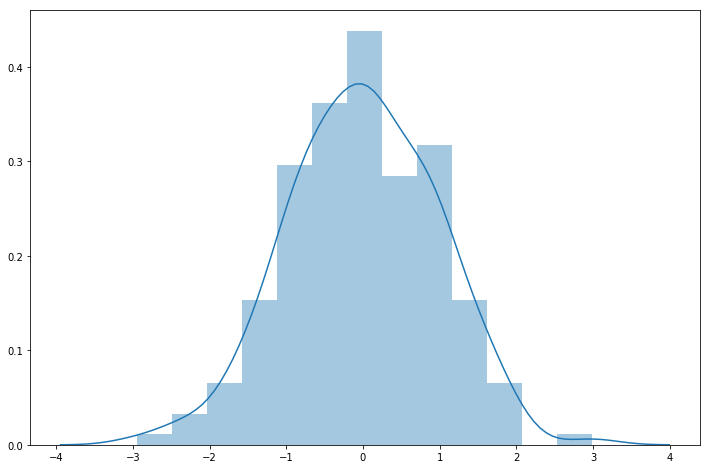

In [173]:
x = np.random.normal(size=200)
sns.distplot(x);

Обърнете внимание как сами си избра bins и си начерта дистрибуцията с крива.

In [174]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,1.055697,3.541870
1,-1.413159,0.530746
2,0.419960,1.798398
3,-0.224002,1.217762
4,1.104733,0.117408


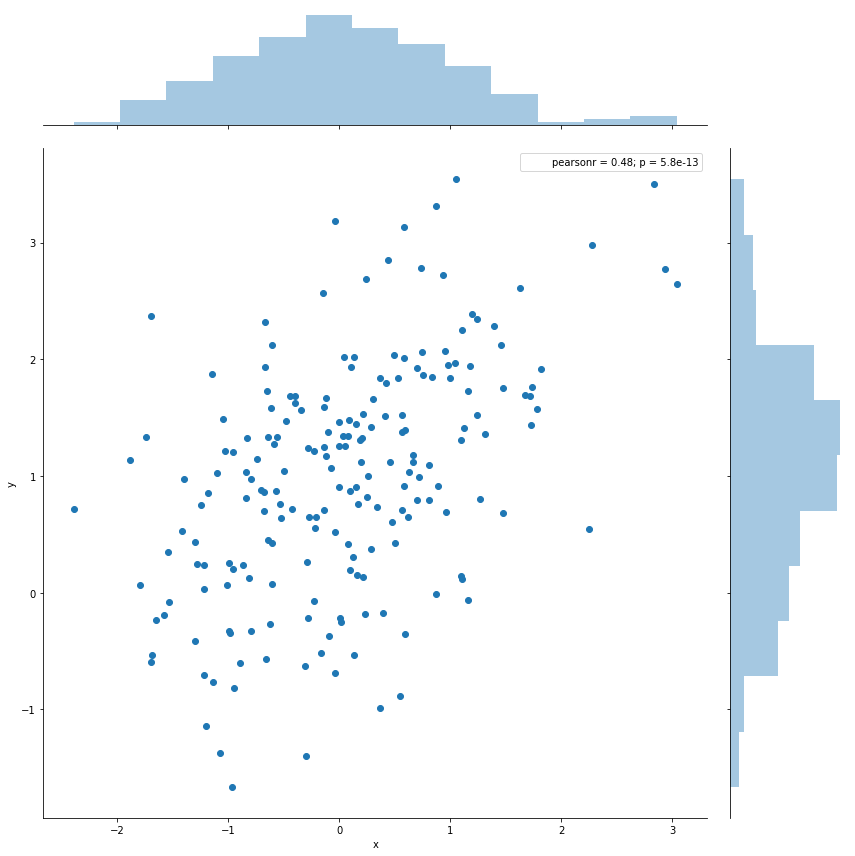

In [175]:
sns.jointplot(x="x", y="y", data=df, size=12);

Seaborn има собствени идеи за добре изглеждащи диаграми. Може да ги включите така:

In [176]:
sns.set()

Вече нещата ще изглеждат малко по-различно:

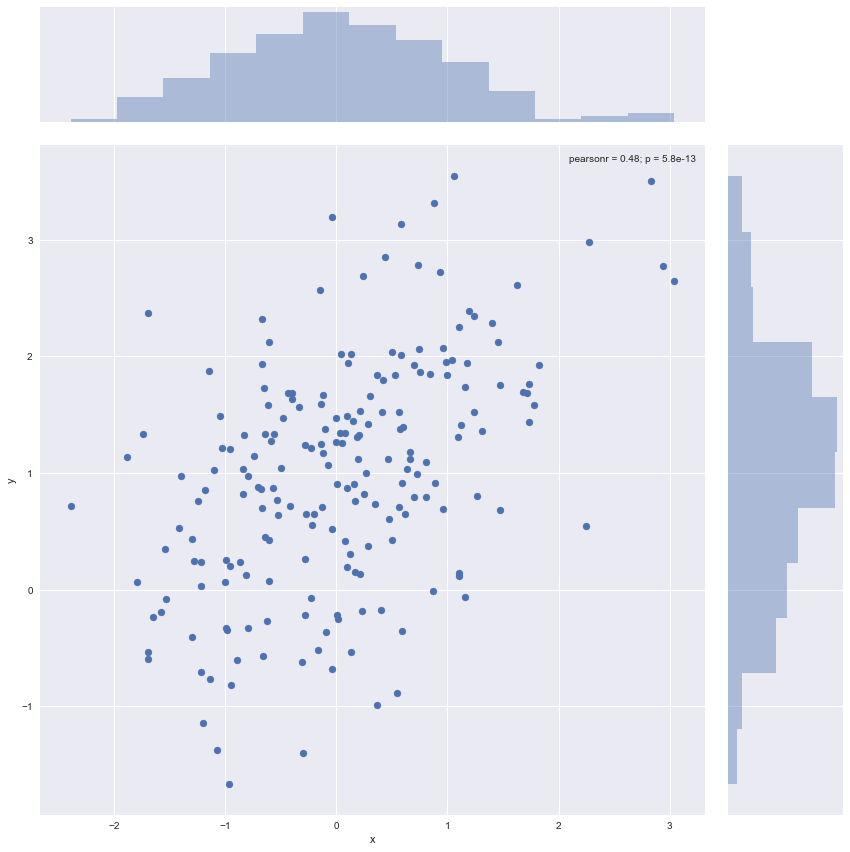

In [177]:
sns.jointplot(x="x", y="y", data=df, size=12);

## Pairplot

Pairplot-а е много удобен начин да разглеждате зависимости между feature-и. За това е подходящ един от стандартните dataset-и, iris. Има го в sklearn, но ще го вземем през seaborn, където е в по-добра форма:

In [178]:
iris = sns.load_dataset("iris")

In [179]:
iris.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,virginica
2,4.7,3.2,1.3,0.2,setosa
112,6.8,3.0,5.5,2.1,virginica
7,5.0,3.4,1.5,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor
96,5.7,2.9,4.2,1.3,versicolor
132,6.4,2.8,5.6,2.2,virginica
43,5.0,3.5,1.6,0.6,setosa
17,5.1,3.5,1.4,0.3,setosa
4,5.0,3.6,1.4,0.2,setosa


Това са категориите:

In [180]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Ето това са feature-ите:

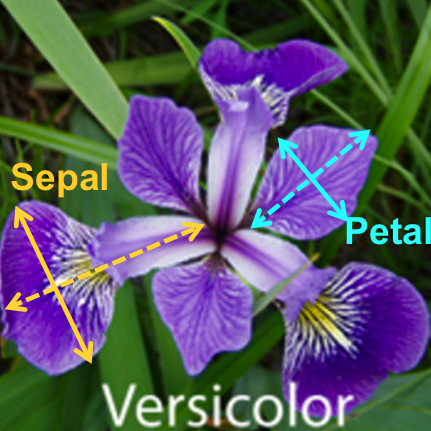

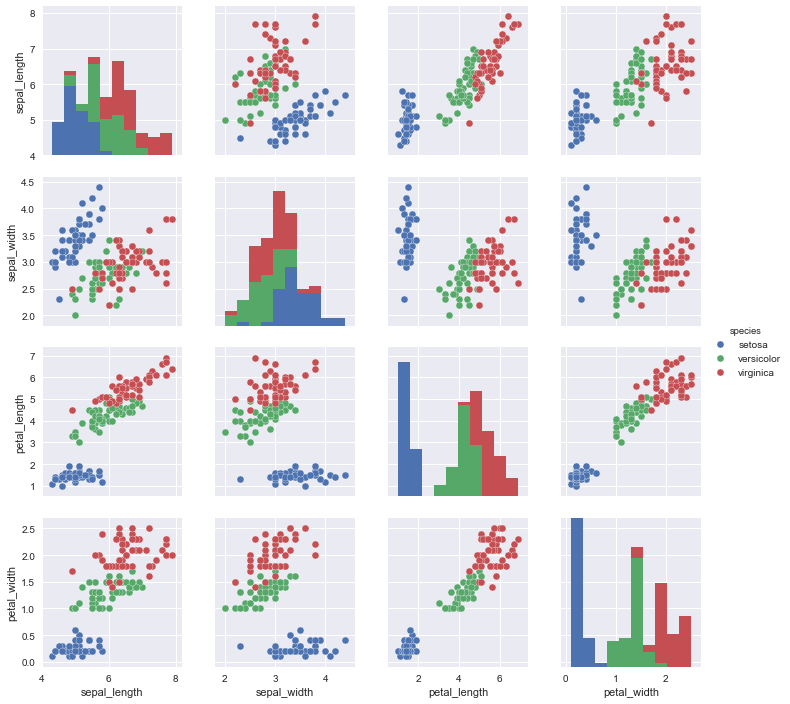

In [181]:
sns.pairplot(iris, hue="species");

Да вземем два други dataset-а от seaborn:

In [182]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

Единия вече го познавате:

In [183]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Другия е за бакшиши:

In [184]:
tips.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Има boxplot, който показва дистрибуция и стандартно отклонение:

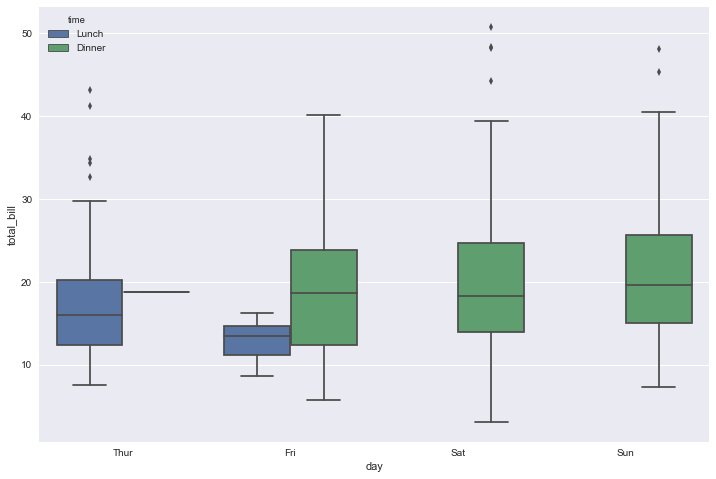

In [185]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

barplot е ясен:

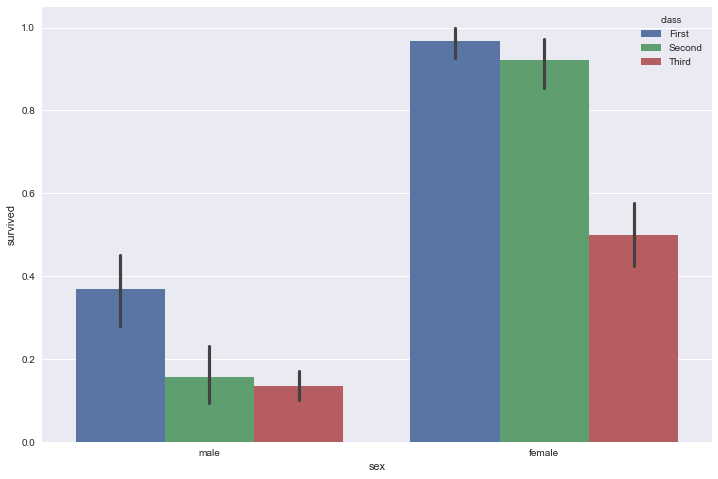

In [186]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

`regplot` чертае линейни зависимости:

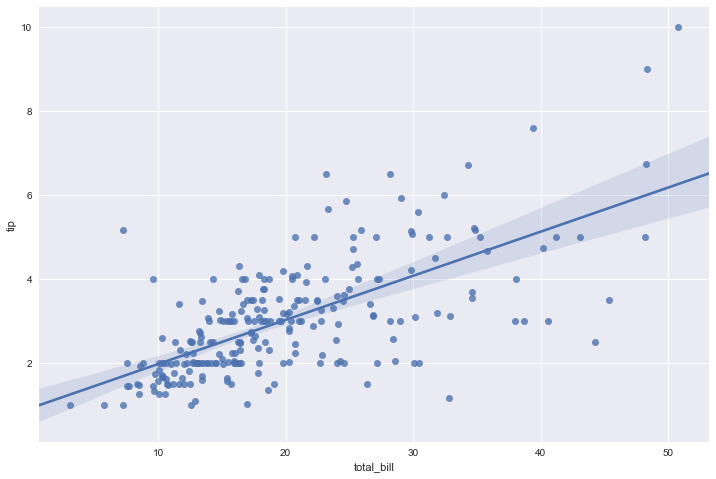

In [187]:
sns.regplot(x="total_bill", y="tip", data=tips);

Повече детайли има в [tutorial-а](https://seaborn.pydata.org/tutorial.html).

## Интеграция с pandas

Финално, `pandas` има няколко метода, които посягат директно към seaborn.

In [188]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,1.382121,0.797927,-0.275731,-2.281736
10,0.724111,1.194148,-1.667422,-2.176403
20,0.016842,1.993811,-1.492402,-2.224131
30,-1.032063,1.173535,-1.239450,-3.940368
40,-2.380780,2.762383,-2.010530,-2.965605
50,-1.399095,3.258019,-2.421064,-3.285662
60,-0.227172,3.042748,-2.845517,-4.451330
70,-1.753389,3.057588,-3.340771,-5.416326
80,-3.023343,3.078835,-3.206913,-3.916869
90,-2.855079,2.318328,-5.205434,-4.017397


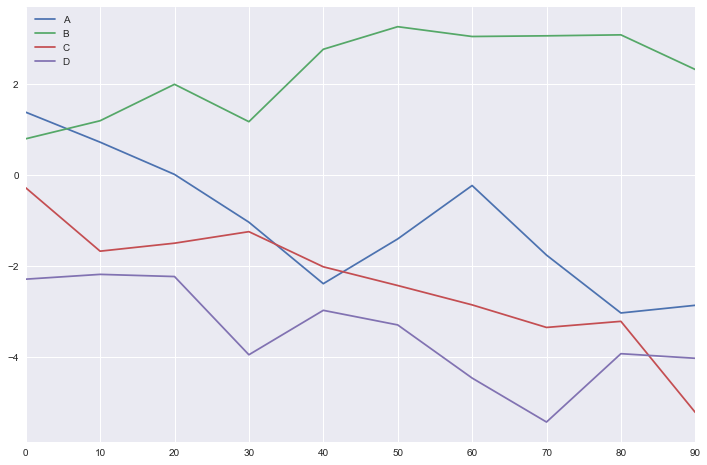

In [189]:
df.plot();

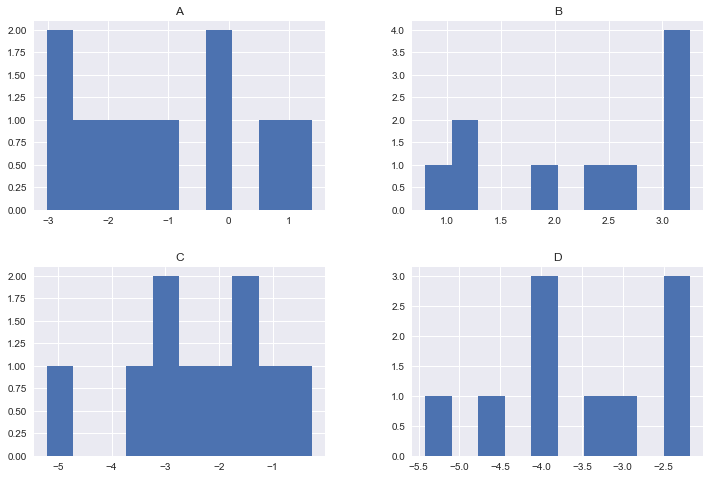

In [190]:
df.hist();

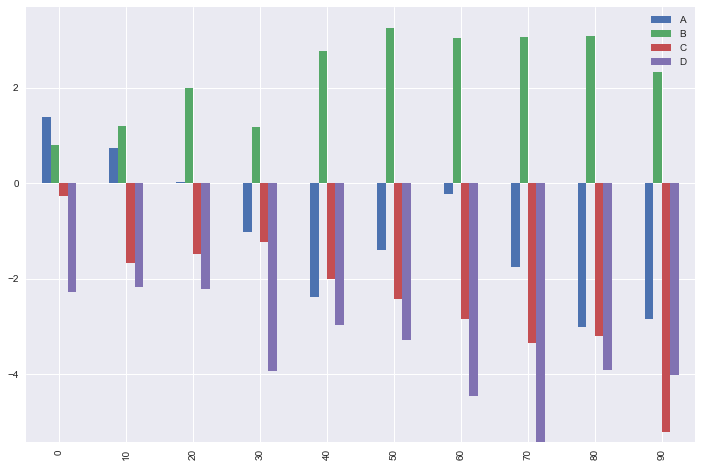

In [191]:
df.plot.bar();

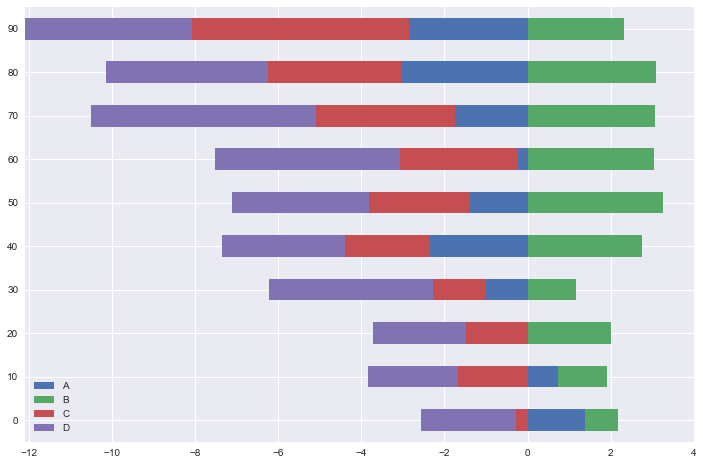

In [192]:
df.plot.barh(stacked=True);

Това може да се комбинира със ванила matplotlib:

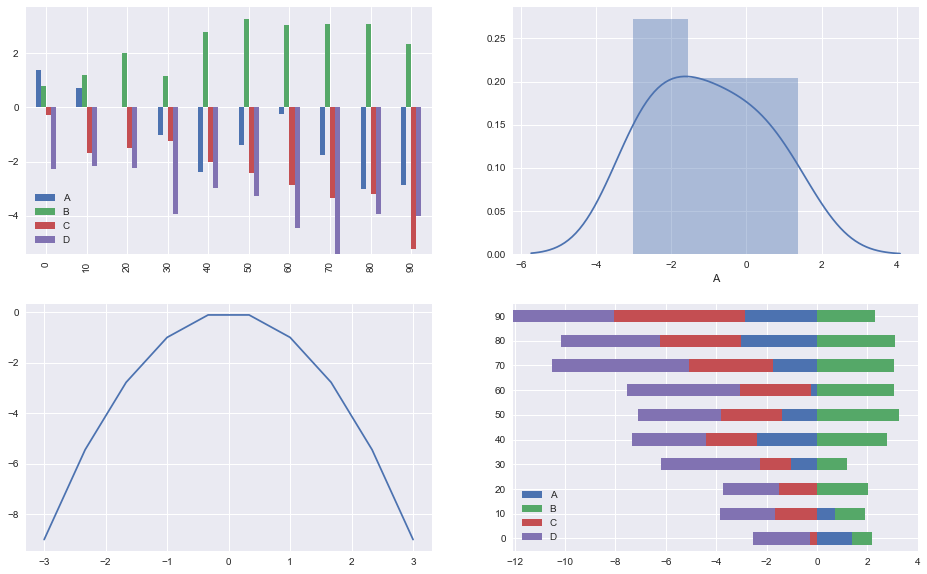

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()
df.plot.bar(ax=axes[0])
sns.distplot(df.A, ax=axes[1])
axes[2].plot(np.linspace(-3, 3, 10), -np.linspace(-3, 3, 10) ** 2)
df.plot.barh(stacked=True, ax=axes[3]);

Има още доста:

* Легенди
* Оси
* Рисуване на точки
* Какво ли още не

Четете си отделно.

# Въпроси